In [108]:
#Description: The purpose of this report is to build a sentiment anlaysis for three specific stocks, SPY, JNJ & TSLA

In [109]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import numpy as np
import re
from textblob import TextBlob
import textblob
import tweepy
import sys
import matplotlib.pyplot as plt


In [110]:
load_dotenv()

True

In [111]:
consumer_key = os.getenv("consumer_key")
consumer_secret = os.getenv("consumer_secret")
Access_Token = os.getenv("Access_Token")
Access_Token_Secret = os.getenv("Access_Token_Secret")

TSLA

In [112]:
auth_handler = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth_handler.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth_handler, wait_on_rate_limit=True)


In [113]:
tsla_serch_term = '#TSLA -filter:retweets'

In [114]:
tweet_amount = 200


In [115]:
tsla_tweets = tweepy.Cursor(api.search, q=tsla_serch_term, lang='en', since= '2018-01-01', tweet_mode= 'extended').items(tweet_amount)


In [116]:
tsla_all_tweets = [tweet.full_text for tweet in tsla_tweets]


In [117]:
#this Data Frame is used to create the
tsla_tweets_df = pd.DataFrame(tsla_all_tweets, columns=['Tweets'])


In [118]:
#this formula is used to clean up the tweets; S+ means “a string of non-whitespace characters"

for _, row in tsla_tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])



In [119]:
tsla_tweets_df['Polarity'] = tsla_tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)


In [120]:
tsla_tweets_df['Result'] = tsla_tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [121]:
positive = tsla_tweets_df[tsla_tweets_df.Result == '+'].count()['Tweets']
negative = tsla_tweets_df[tsla_tweets_df.Result == '-'].count()['Tweets']

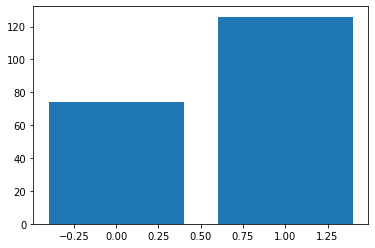

In [122]:
plt.bar([0,1], [positive, negative])

plt.show()


In [123]:
jnj_serch_term = '#JNJ -filter:retweets'

In [124]:
jnj_tweets = tweepy.Cursor(api.search, q=jnj_serch_term, lang='en', since= '2018-01-01', tweet_mode= 'extended').items(tweet_amount)

In [125]:
jnj_all_tweets = [tweet.full_text for tweet in jnj_tweets]


In [126]:
jnj_tweets_df = pd.DataFrame(jnj_all_tweets, columns=['Tweets'])

In [127]:
for _, row in jnj_tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])

In [128]:
jnj_tweets_df['Polarity'] = jnj_tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)

In [129]:
jnj_tweets_df['Result'] = jnj_tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

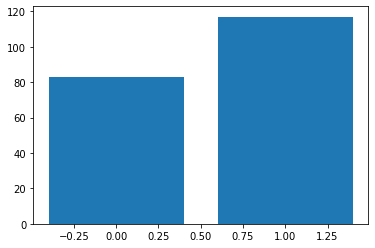

In [130]:
positive = jnj_tweets_df[jnj_tweets_df.Result == '+'].count()['Tweets']
negative = jnj_tweets_df[jnj_tweets_df.Result == '-'].count()['Tweets']
plt.bar([0,1], [positive, negative])

plt.show()


In [131]:
spy_serch_term = '#SPY -filter:retweets'

In [132]:
spy_tweets = tweepy.Cursor(api.search, q=spy_serch_term, lang='en', since= '2018-01-01', tweet_mode= 'extended').items(tweet_amount)

In [133]:
spy_all_tweets = [tweet.full_text for tweet in spy_tweets]

In [134]:
spy_tweets_df = pd.DataFrame(spy_all_tweets, columns=['Tweets'])

In [135]:
for _, row in spy_tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])

In [136]:
spy_tweets_df['Polarity'] = spy_tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)

In [137]:
spy_tweets_df['Result'] = spy_tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

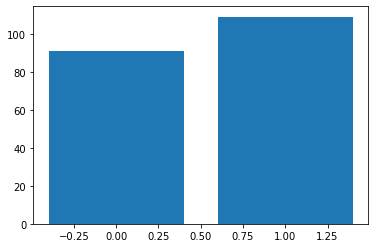

In [138]:
positive = spy_tweets_df[spy_tweets_df.Result == '+'].count()['Tweets']
negative = spy_tweets_df[spy_tweets_df.Result == '-'].count()['Tweets']
plt.bar([0,1], [positive, negative])

plt.show()